In [1]:
import pandas as pd


In [6]:
df = pd.read_csv("bid_data_only.csv")

In [8]:
df.head()

,Unnamed: 0,Entity,Campaign Name (Informational only),Ad Group Name (Informational only),Portfolio Name (Informational only),Ad Group Default Bid (Informational only),Bid,Product Targeting Expression,Resolved Product Targeting Expression (Informational only),Impressions,Clicks,Click-through Rate,Spend,Sales,Orders,Units,Conversion Rate,ACOS,CPC,ROAS
0,15,Product Targeting,NYTBATHROBEWOMENHOODSTEELGREY - Auto - Best Deal,BestDeal6-11-25,Garments Team,0.25,0.25,substitutes,substitutes,209065,202,0.0010,73.67,464.71,18,19,0.09,0.1585,0.36,6.31
1,16,Product Targeting,NYTBATHROBEWOMENHOODSTEELGREY - Auto - Best Deal,BestDeal6-11-25,Garments Team,0.25,0.15,loose-match,loose-match,817,0,0.0000,0.00,0.00,0,0,0.00,0.0000,0.00,0.00
2,17,Product Targeting,NYTBATHROBEWOMENHOODSTEELGREY - Auto - Best Deal,BestDeal6-11-25,Garments Team,0.25,0.26,close-match,close-match,9669,84,0.0087,36.27,554.91,25,25,0.30,0.0654,0.43,15.30
3,18,Product Targeting,NYTBATHROBEWOMENHOODSTEELGREY - Auto - Best Deal,BestDeal6-11-25,Garments Team,0.25,0.15,complements,complements,0,0,0.0000,0.00,0.00,0,0,0.00,0.0000,0.00,0.00
4,50,Product Targeting,UBCOTTONSQUAREPILLOW18x18 - Auto - Low Bids,UBCOTTONSQUAREPILLOW18x18,PILLOWS,0.32,0.26,close-match,close-match,6554,17,0.0026,4.43,87.46,4,4,0.24,0.0507,0.26,19.74


In [9]:
# Function to clean column names
def clean_column_name(col):
    col = col.strip()  # remove leading/trailing spaces
    col = col.replace("(Informational only)", "")  # remove verbose text
    col = col.replace(" ", "_")  # replace spaces with underscores
    col = col.replace("-", "_")  # replace hyphens with underscores
    col = col.replace("/", "_")  # replace slashes
    col = col.replace("(", "")  # remove remaining (
    col = col.replace(")", "")  # remove remaining )
    col = col.lower()  # lowercase all
    return col

# Apply to dataframe
bid_data.columns = [clean_column_name(c) for c in bid_data.columns]

# Check result
print(bid_data.columns)

Index(['unnamed:_0', 'entity', 'campaign_name_', 'ad_group_name_',
       'portfolio_name_', 'ad_group_default_bid_', 'bid',
       'product_targeting_expression',
       'resolved_product_targeting_expression_', 'impressions', 'clicks',
       'click_through_rate', 'spend', 'sales', 'orders', 'units',
       'conversion_rate', 'acos', 'cpc', 'roas'],
      dtype='object')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16919 entries, 0 to 16918
Data columns (total 20 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Unnamed: 0                                                  16919 non-null  int64  
 1   Entity                                                      16919 non-null  object 
 2   Campaign Name (Informational only)                          16919 non-null  object 
 3   Ad Group Name (Informational only)                          16917 non-null  object 
 4   Portfolio Name (Informational only)                         14475 non-null  object 
 5   Ad Group Default Bid (Informational only)                   16919 non-null  float64
 6   Bid                                                         13993 non-null  float64
 7   Product Targeting Expression                                16919 non-null  object 
 

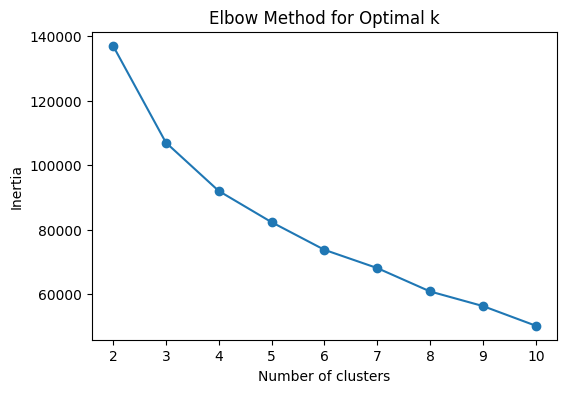

cluster
1          13683
0            291
3             17
2              1
4              1
Name: count, dtype: int64
   Ad Group Default Bid (Informational only)   Bid  Impressions  Clicks  \
0                                       0.25  0.25       209065     202   
1                                       0.25  0.15          817       0   
2                                       0.25  0.26         9669      84   
3                                       0.25  0.15            0       0   
4                                       0.32  0.26         6554      17   

   Click-through Rate  Spend   Sales  Orders  Units  Conversion Rate    ACOS  \
0              0.0010  73.67  464.71      18     19             0.09  0.1585   
1              0.0000   0.00    0.00       0      0             0.00  0.0000   
2              0.0087  36.27  554.91      25     25             0.30  0.0654   
3              0.0000   0.00    0.00       0      0             0.00  0.0000   
4              0.0026   4.43  

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assume df is your dataframe
# Select numeric columns
numeric_cols = [
    'Ad Group Default Bid (Informational only)', 'Bid',
    'Impressions', 'Clicks', 'Click-through Rate', 'Spend',
    'Sales', 'Orders', 'Units', 'Conversion Rate', 'ACOS', 'CPC', 'ROAS'
]

# Drop rows with missing numeric data
df_numeric = df[numeric_cols].dropna()

# Standardize the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Determine optimal number of clusters using elbow method (optional)
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(6,4))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Fit KMeans with chosen k (example: 4 clusters)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_numeric['cluster'] = kmeans.fit_predict(X_scaled)

# Inspect cluster assignment
print(df_numeric[['cluster']].value_counts())
print(df_numeric.head())


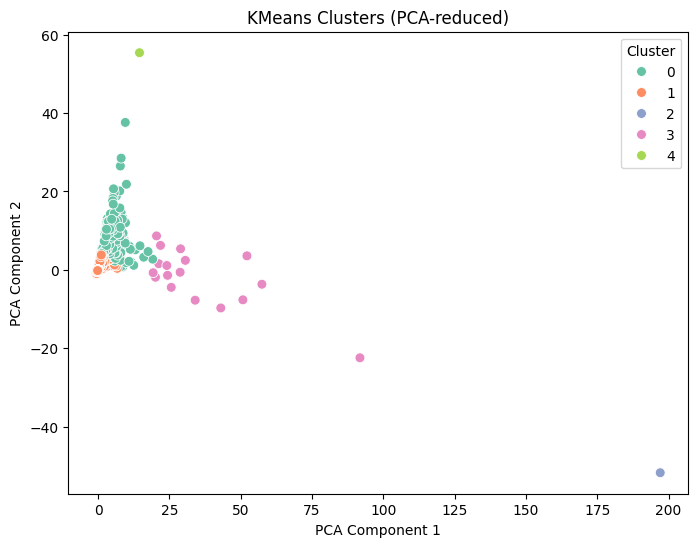

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric columns
numeric_cols = [
    'Ad Group Default Bid (Informational only)', 'Bid',
    'Impressions', 'Clicks', 'Click-through Rate', 'Spend',
    'Sales', 'Orders', 'Units', 'Conversion Rate', 'ACOS', 'CPC', 'ROAS'
]

# Drop missing values
df_numeric = df[numeric_cols].dropna()

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# KMeans clustering
k = 5  # choose number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df_numeric['cluster'] = clusters

# Dimensionality reduction for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df_numeric['pca1'] = X_pca[:, 0]
df_numeric['pca2'] = X_pca[:, 1]

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_numeric, x='pca1', y='pca2', hue='cluster', palette='Set2', s=50)
plt.title('KMeans Clusters (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


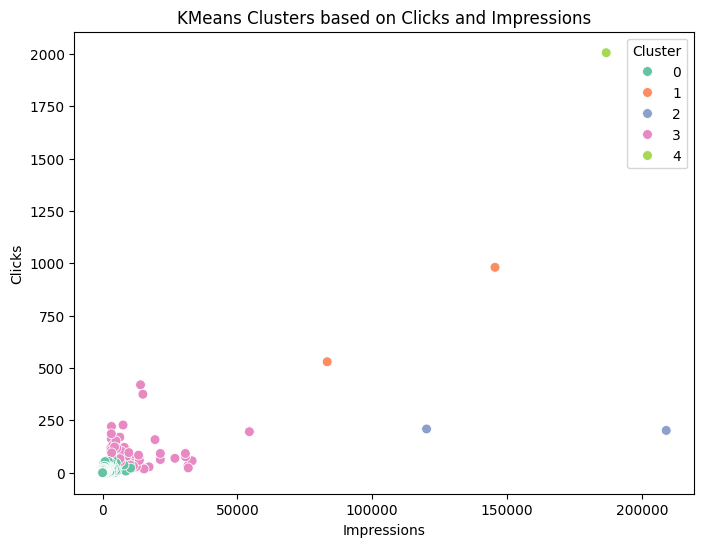

              Clicks    Impressions
cluster                            
0           0.350172      41.911242
1         755.500000  114430.500000
2         205.500000  164615.000000
3         100.750000   13704.687500
4        2006.000000  186801.000000


In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select only clicks and impressions
features = ['Clicks', 'Impressions']

# Drop rows with missing data
df_cluster = df[features].dropna()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# KMeans clustering
k = 5  # choose number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cluster, x='Impressions', y='Clicks', hue='cluster', palette='Set2', s=50)
plt.title('KMeans Clusters based on Clicks and Impressions')
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.legend(title='Cluster')
plt.show()

# Optional: summarize cluster statistics
cluster_summary = df_cluster.groupby('cluster')[features].mean()
print(cluster_summary)
